<h1>Introduction to Python Regex Module</h1>
In this notebook, we explore regex module functions and capabilities<br>
https://docs.python.org/3/library/re.html

In [1]:
import re # python regex module

<h2>Raw String and Regular String</h2>
Always use Raw string for Regex Patterns

In [2]:
# regular string.  embedded special characters are intrepreted by python
s = 'a\tb'

# raw string. python does not interpret the content of the string. 
# USE RAW STRING FOR REGEX PATTERNS
sr = r'a\tb'

print('regular string:', s)
print()
print('raw string:', sr)

regular string: a	b

raw string: a\tb


<h2>re.match - Find first match</h2>
Find match at the beginning of a string<br>
Useful for strict validation - for example, validating input from users

In [7]:
pattern = r"\d+" # \d = digit. + = one or more.  This pattern matches one or more digits

text = "666 is my lucky number"

match = re.match(pattern,text)

# check if match was successful
if match:
    print (match.group(0))
else:
    print ("No match")                          

666


In [8]:
pattern = r"\d+" # \d = digit. + = one or more.  This pattern matches one or more digits

# number is not at the beginning. So, this match will fail
text = "my lucky number is 42"

match = re.match(pattern, text)

if match:
    print(match.group(0))
else:
    print("No Match")      

No Match


<h3>input validation</h3>

In [26]:
def is_integer(text):
    # Pattern 1
    # \d = digit
    # \d+ = one or more digits
    # pattern = r"\d+" 
    
    # Pattern 2
    # $ = end of string or line
    # one or more digits. followed by end of string or line    
    # not cross-platform. works only with match method
    # pattern = r"\d+$"
        
    # Pattern 3
    # start of string or line. followed by one or more digits. followed by end of string or line
    # ^ = start of string or line.
    # $ = end of string or line
    # cross-platform
    pattern = r"^\d+$" 
    
    match = re.match(pattern, text)
    
    if match:
        return True
    else:
        return False

In [23]:
is_integer("1234")

True

<h3>Unit Test</h3>

In [24]:
def test_is_integer():
    pass_list = ["123","456","900","0991"]
    fail_list = ["a123","124a","1 2 3","1\t2"," 12","45 "]
    
    for text in pass_list:
        if not is_integer(text):
            print('\tFailed to detect an integer ',text)
    
    for text in fail_list:
        if is_integer(text):
            print('\tIncorrectly classified as an integer ',text)
    
    print('Test complete')

In [27]:
test_is_integer()

Test complete


<h2>re.search - Find the first match anywhere</h2>

In [28]:
pattern = r"\d+" # one or more digits

text = "42 is my lucky number"

match = re.search(pattern,text)

# check if match was successful
if match:
    print('Found a match:', match.group(0), 'at index:', match.start())
else:
    print ("No match")      

Found a match: 42 at index: 0


In [29]:
pattern = r"\d+" # \d = digit. + = one or more.  This pattern matches one or more digits

# search method will look for the first match anywhere in the text
text = "my lucky number is 42"

match = re.search(pattern, text)

if match:
    print('Found a match:',match.group(0), 'at index:', match.start())
else:
    print("No Match")   

Found a match: 42 at index: 19


In [31]:
# But, it finds only the first match in the text

pattern = r"\d+" # \d = digit. + = one or more.  This pattern matches one or more digits

# search method will look ONLY for the first match anywhere in the text
text = "my lucky numbers are 42 and 24"

match = re.search(pattern, text)

if match:
    print('Found a match:',match.group(0), 'at index:', match.start())
else:
    print("No Match")   

Found a match: 42 at index: 21


<h4>TODO: Modify is_integer to use search method</h4>

In [38]:
def is_integer(text):
    # Pattern 1
    # \d = digit
    # \d+ = one or more digits
    # pattern = r"\d+" 
    
    # Pattern 2
    # $ = end of string or line
    # one or more digits. followed by end of string or line    
    # not cross-platform. works only with match method
    # pattern = r"\d+$"
        
    # Pattern 3
    # start of string or line. followed by one or more digits. followed by end of string or line
    # ^ = start of string or line.
    # $ = end of string or line
    # cross-platform
    pattern = r"^\d+$" 
    
    match = re.search(pattern, text)
    
    if match:
        return True
    else:
        return False

In [39]:
def test_is_integer():
    pass_list = ["123","456","900","0991"]
    fail_list = ["a123","124a","1 2 3","1\t2"," 12","45 "]
    
    for text in pass_list:
        if not is_integer(text):
            print('\tFailed to detect an integer',text)
    
    for text in fail_list:
        if is_integer(text):
            print('\tIncorrectly classified as an integer',text)
    
    print('Test complete')

In [40]:
test_is_integer()

Test complete


<h2>re.findall - Find all the matches</h2>
method returns only after scanning the entire text

In [41]:
# Find all numbers in the text
pattern = r"\d+"
text = "NY Postal Codes are 10001, 10002, 10003, 10004"

print ('Pattern',pattern)
# successful match
match = re.findall(pattern, text)

if match:
    print('Found matches:', match)
else:
    print("No Match")     

Pattern \d+
Found matches: ['10001', '10002', '10003', '10004']


<h2>re.finditer - Iterator</h2>
method returns an iterator with the first match and you have control to ask for more matches

In [42]:
pattern = r"\d+"
text = "NY Postal Codes are 10001, 10002, 10003, 10004"

print ('Pattern',pattern)
# successful match
match_iter = re.finditer(pattern, text)

print ('Matches')
for match in match_iter:
    print('\t', match.group(0), 'at index:', match.start())

Pattern \d+
Matches
	 10001 at index: 20
	 10002 at index: 27
	 10003 at index: 34
	 10004 at index: 41


<h2>groups - find sub matches </h2>
group 0 = refers to the text in a string that matched the pattern<br>
group 1..n onwards refer to the sub-groups

In [48]:
# Separate year, month and day
# 1. pattern = r"\d+"
# 2. pattern = r"\d{4}\d{2}\d{2}"
# 3. pattern = r"(\d{4})(\d{2})(\d{2})"

pattern = r"(\d{4})(\d{2})(\d{2})"
text = "Start Date: 20200920"

print("Pattern",pattern)
match = re.search(pattern, text)

if match:
    print('Found a match', match.group(0), 'at index:', match.start())
    
    print('Groups', match.groups())
        
    for idx, value in enumerate(match.groups()):
        print ('\tGroup', idx+1, value, '\tat index', match.start(idx+1))
        
else:
    print("No Match")

Pattern (\d{4})(\d{2})(\d{2})
Found a match 20200920 at index: 12
Groups ('2020', '09', '20')
	Group 1 2020 	at index 12
	Group 2 09 	at index 16
	Group 3 20 	at index 18


<h3>named groups</h3>

In [49]:
# Separate year, month and day
pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"
text = "Start Date: 20200920"

print("Pattern",pattern)
match = re.search(pattern, text)

if match:
    print('Found a match', match.group(0), 'at index:', match.start())    
    print('\t',match.groupdict())
else:
    print("No Match")  

Pattern (?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})
Found a match 20200920 at index: 12
	 {'year': '2020', 'month': '09', 'day': '20'}


<h3>access by group name</h3>

In [50]:
# Separate year, month and day
pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"
text = "Start Date: 20200920"

print("Pattern",pattern)
match = re.search(pattern, text)

if match:
    print('Found a match', match.group(0), 'at index:', match.start())    
    print('\tYear:',match.group('year'))
    print('\tMonth:',match.group('month'))
    print('\tDay:',match.group('day'))    
else:
    print("No Match") 

Pattern (?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})
Found a match 20200920 at index: 12
	Year: 2020
	Month: 09
	Day: 20


<h2>re.sub - find and replace</h2>

<h3>two patterns: one to find the text and another pattern with replacement text</h3>

In [51]:
# Format date
#  20200920 => 09-20-2020

pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"
text = "Start Date: 20200920, End Date: 20210920"

# substitute with value space dollars
replacement_pattern = r"\g<month>-\g<day>-\g<year>"

print ('original text\t', text)
print()

# find and replace
new_text= re.sub(pattern, replacement_pattern, text)

print('new text\t', new_text)

original text	 Start Date: 20200920, End Date: 20210920

new text	 Start Date: 09-20-2020, End Date: 09-20-2021


<h3>custom function to generate replacement text</h3>

In [52]:
# Format 
#   20200920 => Sep-20-2020
import datetime

In [53]:
def format_date(match):   
    in_date = match.groupdict()
    
    year = int(in_date['year'])
    month = int(in_date['month'])
    day = int(in_date['day'])
    
    #https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
    return datetime.date(year,month,day).strftime('%b-%d-%Y')

In [54]:
# Format date
pattern = r"(?P<year>\d{4})(?P<month>\d{2})(?P<day>\d{2})"
text = "Start Date: 20200920, End Date: 20210920"

print ('original text\t', text)
print()

# find and replace
new_text= re.sub(pattern, format_date, text)

print('new text\t', new_text)

original text	 Start Date: 20200920, End Date: 20210920

new text	 Start Date: Sep-20-2020, End Date: Sep-20-2021


<h2>re.split - split text based on specified pattern</h2>

In [55]:
pattern = r","

text = "a-c,x,y,1"

re.split(pattern,text)

['a-c', 'x', 'y', '1']

# Exercise
## find one or more digits followed by the word dollars. capture the digits in value group
## substitute with value space dollars

Example

original text	 movie ticket: 15dollars. popcorn: 8dollars

new text	 movie ticket: 15 dollars. popcorn: 8 dollars

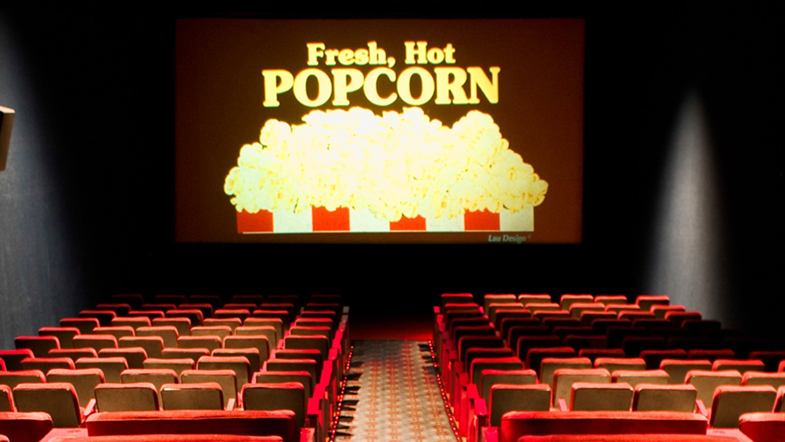

In [58]:
# find one or more digits followed by the word dollars. capture the digits in value group
pattern = r"(?P<value>\d+)dollars" 

text = "movie ticket: 15dollars. popcorn: 8dollars"

# substitute with value space dollars
replacement_pattern = r"\g<value> dollars"

print ('original text\t', text)
print()

# find and replace
new_text= re.sub(pattern, replacement_pattern, text)

print('new text\t', new_text)

original text	 movie ticket: 15dollars. popcorn: 8dollars

new text	 movie ticket: 15 dollars. popcorn: 8 dollars


# Exercise

## Find celsius deg. and replace them as Fahrenheit

Example

Text before: Today's temperature is 25°C

Text after:  Today's temperature is 77.0°F

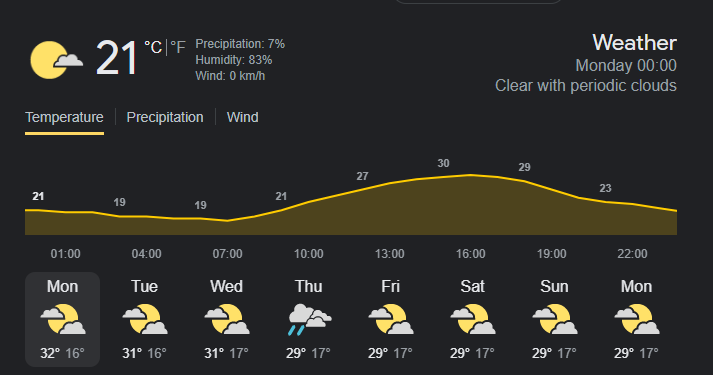

In [59]:
# Make this an assignment
def celsius_to_fahrenheit(match):
    degCelsius =  float(match.group("celsius"))
    degF = 32.0 + (degCelsius * 9.0 / 5.0);
    return '{0}°F'.format(degF);

In [60]:
def substitution_example_custom_logic():
    pattern = r"(?P<celsius>\d+)\u00B0C" # \u00B0C = (degree) character
    text = "Today's temperature is 25°C"
            
    print ('Pattern: {0}'.format(pattern))
    print ('Text before: {0}'.format(text))
        
    new_text = re.sub(pattern, celsius_to_fahrenheit, text)
    
    print('Text after:  {0}'.format(new_text))

In [61]:
substitution_example_custom_logic()

Pattern: (?P<celsius>\d+)\u00B0C
Text before: Today's temperature is 25°C
Text after:  Today's temperature is 77.0°F
